In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from  sklearn.tree  import  DecisionTreeClassifier 

In [2]:
df1 = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/event_data_train.csv')

In [3]:
df2 = pd.read_csv('C:/Program Files/Python37/1/CSV/stepik/submissions_data_train.csv')

In [4]:
'''
df1
step_id - id стэпа
user_id - анонимизированный id юзера
timestamp - время наступления события в формате unix date
action - событие, возможные значения: 
discovered - пользователь перешел на стэп
viewed - просмотр шага,
started_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага
passed - удачное решение практического шага
'''

'\ndf1\nstep_id - id стэпа\nuser_id - анонимизированный id юзера\ntimestamp - время наступления события в формате unix date\naction - событие, возможные значения: \ndiscovered - пользователь перешел на стэп\nviewed - просмотр шага,\nstarted_attempt - начало попытки решить шаг, ранее нужно было явно нажать на кнопку - начать решение, перед тем как приступить к решению практического шага\npassed - удачное решение практического шага\n'

In [ ]:
'''
df2
step_id - id стэпа
timestamp - время отправки решения в формате unix date
submission_status - статус решения
user_id - анонимизированный id юзера
'''

In [5]:
df1['date'] = pd.to_datetime(df1.timestamp, unit='s')
df1['day'] = df1.date.dt.date

df2['date'] = pd.to_datetime(df2.timestamp, unit='s')
df2['day'] = df2.date.dt.date

In [6]:
usc = df2.pivot_table(index='user_id', columns='submission_status', values='step_id', aggfunc='count', fill_value=0)

In [7]:
dfn = df1[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [8]:
dfn = pd.Series(np.concatenate(dfn, axis=0))

In [9]:
dfn = dfn / (24 * 60 * 60)

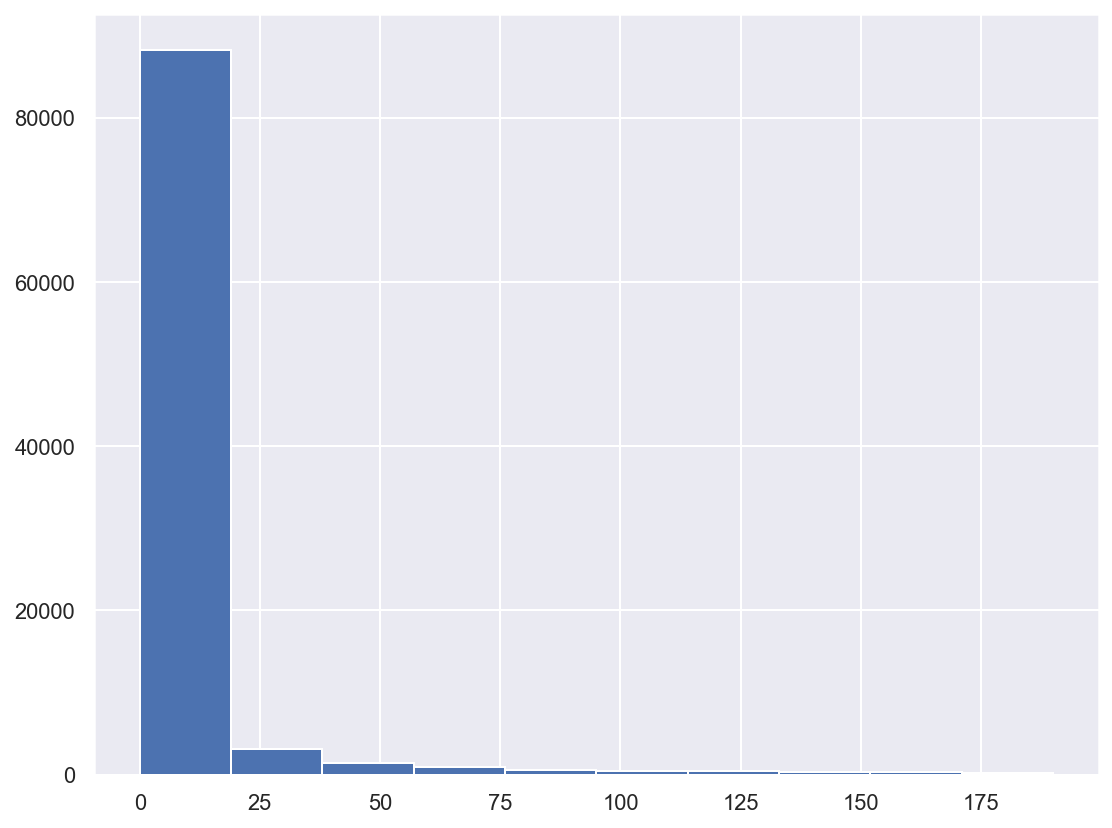

In [10]:
sns.set(rc={'figure.figsize': (9,7)})
dfn[dfn < 190].hist()

In [11]:
usc

submission_status,correct,wrong
user_id,,
2,2,0
3,29,23
5,2,2
8,9,21
14,0,1
...,...,...
26787,3,0
26790,1,0
26794,33,9


In [40]:
usc[(usc['correct'] > 200)]

submission_status,correct,wrong
user_id,,
1046,421,513
